## Amortized Cost

The amount of operations that you perform for a particular method call *on average*

Amortized Cost = #operations / #calls

The average cost per call


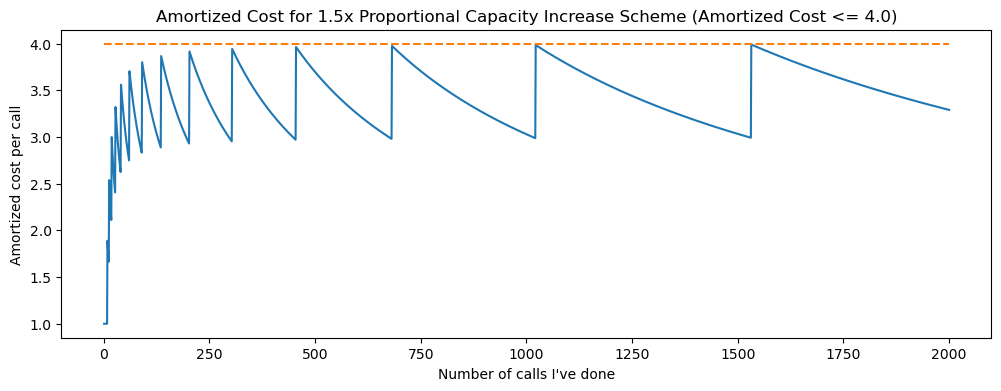

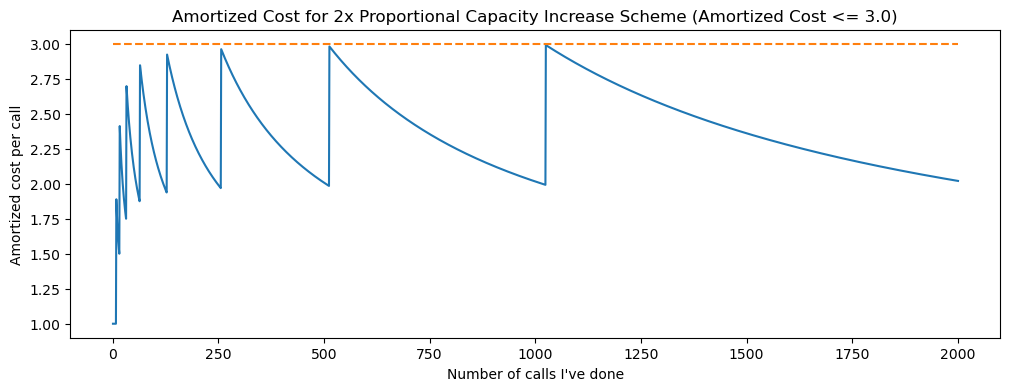

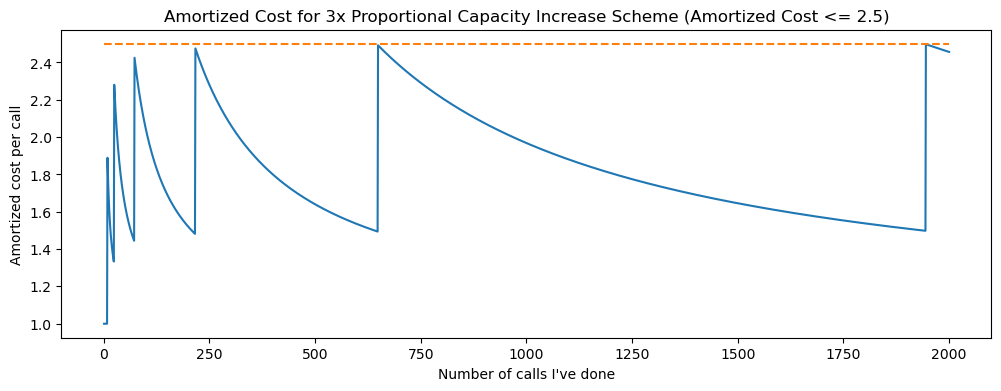

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class ArrayList:
    ## If I've only added 4 elements, I have room to grow
    # 0 1 4 9 x x x x
    ##
    def __init__(self, cap_constant=2, proportional=True):
        """
        Parameters
        ----------
        cap_constant: float
            If proportional, factor by which to increase capacity
            If not proportional, constant amount by which to increase capacity
        """
        self.capacity = 8
        self.cap_constant = cap_constant
        self.proportional = proportional
        self.array = np.zeros(self.capacity) # Underlying array
        # We make it bigger than it needs to be so we can add elements
        # without having to make a new array
        self.N = 0 # Start off with 0 elements
        
        self.operations = 0 # Number of operations I've done
        self.calls = 0 # Number of method calls to append and pop
    
    def get_amortized(self):
        return self.operations / self.calls
    
    def _proportional_increase_capacity(self, d=2):
        """
        Increase the array capacity in proportion to its current capacity
        
        Parameters
        ----------
        d: float
            Factor by which to increase capacity
        """
        new_capacity = int(self.capacity*d)
        # Create a new array at twice the capacity
        new_array = np.zeros(new_capacity)
        # Copy over all the elements that are currently there
        # into this new array
        for i in range(self.capacity):
            new_array[i] = self.array[i]
            self.operations += 1
        # Replace the array instance variable with this larger array
        self.array = new_array
        # Remember that we now have additional capacity
        self.capacity = new_capacity
    
    def _add_constant_capacity(self, c=10):
        """
        Increase the array capacity by a constant amount
        Parameters
        ----------
        c: int
            Add this amount to the capacity
        """
        new_array = np.zeros(self.capacity + c)
        # Copy over all the elements that are currently there
        # into this new array
        for i in range(self.capacity):
            new_array[i] = self.array[i]
            self.operations += 1
        # Replace the array instance variable with this larger array
        self.array = new_array
        # Remember that we now have additional capacity
        self.capacity += c
    
    def append(self, x):
        """
        Add an element to the end of the list
        
        Parameters
        ----------
        x: object
            Element to add to the list
        """
        self.calls += 1
        if self.N == self.capacity:
            if self.proportional:
                self._proportional_increase_capacity(self.cap_constant)
            else:
                self._add_constant_capacity(self.cap_constant)
        
        self.operations += 1
        self.array[self.N] = x
        self.N += 1 # I'm using one more element now
    
    def __getitem__(self, idx):
        """
        Random access of an element at index idx
        
        Returns
        -------
        The list element at index idx
        """
        return self.array[idx]
    
    def __len__(self):
        return self.N
    
n_elements = 2000


for cap_constant in [1.5, 2, 3]:
    amortized = np.zeros(n_elements)
    mylist = ArrayList(cap_constant, proportional=True)
    for i in range(n_elements):
        mylist.append(i**2)
        amortized[i] = mylist.get_amortized()
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(1, n_elements+1), amortized)
    ceiling = 1 + 1/(1-1/cap_constant)
    plt.plot([0, n_elements], [ceiling, ceiling], linestyle='--')
    plt.xlabel("Number of calls I've done")
    plt.ylabel("Amortized cost per call")
    plt.title("Amortized Cost for {}x Proportional Capacity Increase Scheme (Amortized Cost <= {:.1f})".format(cap_constant, ceiling))

# Formula for Amortized Cost for ArrayList Proportional Increase

Suppose I am adding $N$ elements.  What's the worst case formula for the number operations?

1. Assignment Operations
No matter what, I have to do $N$ operations to assign the elements I'm adding

2. Doubling operations: Let's suppose that $N$ is a power of 2, and we start off with a capacity of 1

By Zeno's paradox, we have

<img src = "Zeno.svg" width="60%">

Total number of operations = assignment operations + doubling operations

ops(N) < N + 2N

amortized cost < (N + 2N) / N = 3


### General formula for a factor of $d$ Capacity Increase

1. Assignment operations: N
2. Capacity increase: < 1/(1-1/c) by a <a href = "https://mathworld.wolfram.com/GeometricSeries.html">geometric series argument</a>

Ex) c = 2 (doubling), 1/(1-1/2) = 2

Amortized cost < 1 + 2 = 3

Ex) c = 3 (tripling), 1/(1-1/3) = 3/2

Amortized cost < 1 + 3/2 = 2.5

# Constant increase of capacity

The amortized performance degrades from constant to linear if we always add the same amount to the capacity, no matter how large.  So increasing *in proportion to current size* is very important


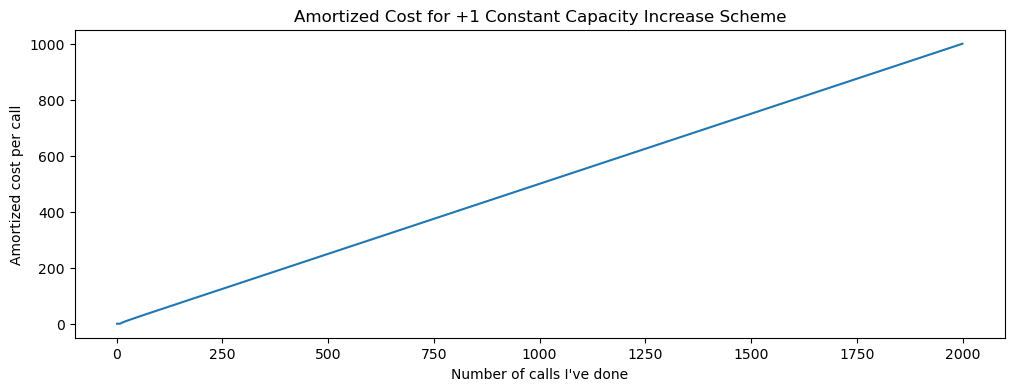

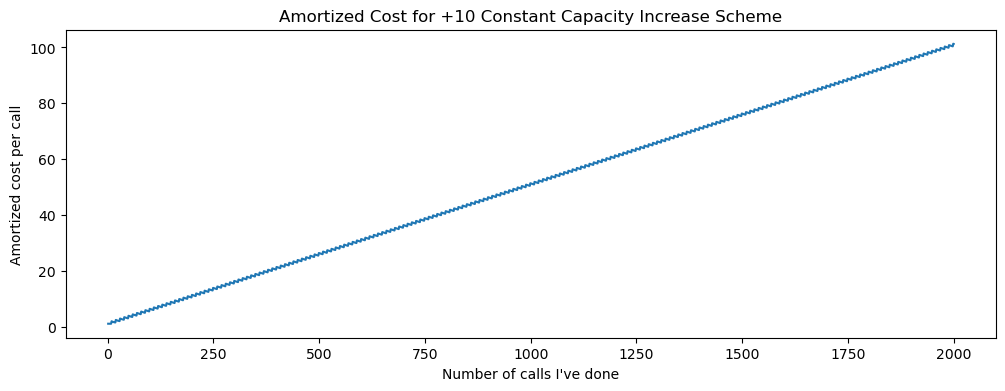

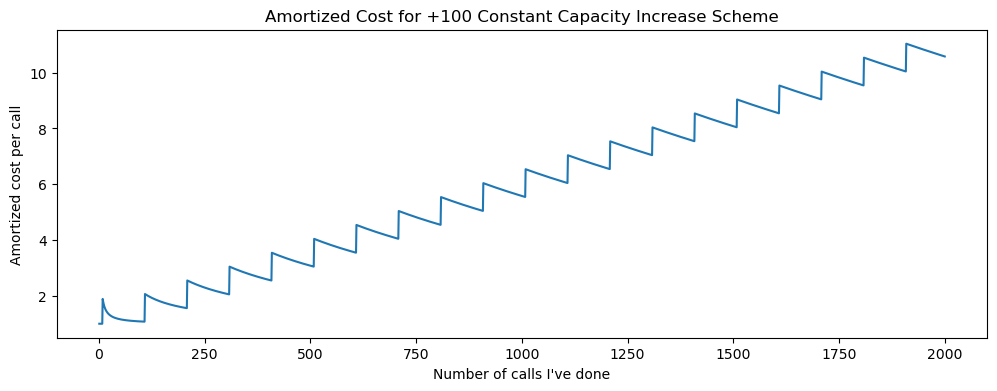

In [2]:
for cap_constant in [1, 10, 100]:
    amortized = np.zeros(n_elements)
    mylist = ArrayList(cap_constant, proportional=False)
    for i in range(n_elements):
        mylist.append(i**2)
        amortized[i] = mylist.get_amortized()
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(1, n_elements+1), amortized)
    plt.xlabel("Number of calls I've done")
    plt.ylabel("Amortized cost per call")
    plt.title("Amortized Cost for +{} Constant Capacity Increase Scheme".format(cap_constant))